### Import librairies
Nous importons les bibliothèque fondamentale pour la programme

In [1]:
import pandas as pd
import numpy as np

### Import donnée
Nous allons importer les données des trainSet et testSet dans les features et la variable à déviner

In [2]:
def importData(path):
    #columnNames=["ECP","RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4","FP"]
    columnNames=["RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4","FP"]
    delimit=','
    data = pd.read_csv(path, names=columnNames, sep=delimit)
    #data = data.drop(columns="ECP")
    return data

In [19]:
#pathTrain='../2-TransformedData/export_2020-Jan-28-17_01_12.csv'
pathTrain='../3-DataSet/20200122/95/trainSets95.csv'
trainSet = importData(pathTrain)

trainSet.head(10)

,RC,MIN,MAX,MEAN,START,END,DURATION,CV,A1,A2,A3,A4,FP
0,556.0,-60.5,-53.0,-54.115108,1.579697e+15,1.579697e+15,82996456.0,-0.013790,0.0,0.0,556.0,0.0,1
1,1.0,-63.5,-63.5,-63.500000,1.579700e+15,1.579700e+15,0.0,-0.000000,0.0,1.0,0.0,0.0,1
2,8.0,-56.5,-55.0,-55.875000,1.579697e+15,1.579697e+15,22464963.0,-0.008664,0.0,0.0,8.0,0.0,1
3,193.0,-63.5,-56.5,-57.176166,1.579699e+15,1.579699e+15,27611724.0,-0.010867,0.0,0.0,0.0,193.0,1
4,1.0,-58.5,-58.5,-58.500000,1.579701e+15,1.579701e+15,0.0,-0.000000,1.0,0.0,0.0,0.0,0
5,10.0,-65.0,-58.5,-62.100000,1.579697e+15,1.579697e+15,739426.0,-0.036862,2.0,0.0,4.0,4.0,0
6,2070.0,-63.5,-55.0,-59.737198,1.579697e+15,1.579697e+15,83239829.0,-0.045504,505.0,542.0,481.0,542.0,1
7,2.0,-63.5,-63.5,-63.500000,1.579701e+15,1.579701e+15,37073.0,-0.000000,0.0,0.0,2.0,0.0,0
8,861.0,-63.5,-55.0,-59.699768,1.579697e+15,1.579697e+15,32988482.0,-0.045002,190.0,221.0,225.0,225.0,1
9,6.0,-59.5,-53.5,-56.166667,1.579701e+15,1.579701e+15,636839.0,-0.042899,2.0,2.0,2.0,0.0,0


In [20]:
#trainSet = pd.DataFrame({})
#trainSet['RC']=data['RC']
#trainSet['START']=data['START']
#trainSet['END']=data['END']


#trainSet['MIN']=data['MIN']
#trainSet['MAX']=data['MAX']
#trainSet['MEAN']=data['MEAN']
#trainSet['DURATION']=data['DURATION']
#trainSet['CV']=data['CV']
#trainSet['A1']=data['A1']
#trainSet['A2']=data['A2']
#trainSet['A3']=data['A3']
#trainSet['A4']=data['A4']

#trainSet['FP']=data['FP']
print(trainSet.shape)
trainSet.head(5)


(148, 13)


,RC,MIN,MAX,MEAN,START,END,DURATION,CV,A1,A2,A3,A4,FP
0,556.0,-60.5,-53.0,-54.115108,1.579697e+15,1.579697e+15,82996456.0,-0.013790,0.0,0.0,556.0,0.0,1
1,1.0,-63.5,-63.5,-63.500000,1.579700e+15,1.579700e+15,0.0,-0.000000,0.0,1.0,0.0,0.0,1
2,8.0,-56.5,-55.0,-55.875000,1.579697e+15,1.579697e+15,22464963.0,-0.008664,0.0,0.0,8.0,0.0,1
3,193.0,-63.5,-56.5,-57.176166,1.579699e+15,1.579699e+15,27611724.0,-0.010867,0.0,0.0,0.0,193.0,1
4,1.0,-58.5,-58.5,-58.500000,1.579701e+15,1.579701e+15,0.0,-0.000000,1.0,0.0,0.0,0.0,0


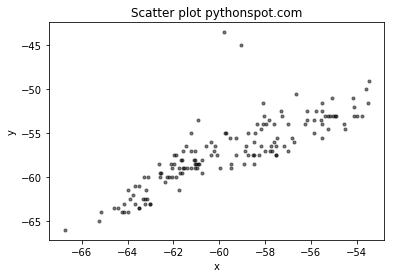

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
N = 500
x = trainSet['MEAN']
y = trainSet['MAX']
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Import plot librairie
Il est temps de voir comment les élements X et FP sont liées les uns aux autres avec un graphe

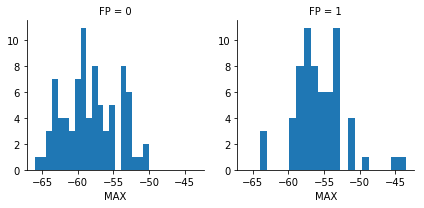

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g = sns.FacetGrid(trainSet, col='FP')
g.map(plt.hist, 'MAX', bins=20)

### Split Data
Nous allons découper les données d'apprentissage pour avoir la partie feature et y

In [23]:
#features=trainSet.loc[:,'RC':'A4']
X = np.array(trainSet.iloc[:,:-1]).astype(int)
y = np.array(trainSet['FP'])
print(X.shape)
print(trainSet.shape)
print(y.shape)

(148, 12)
(148, 13)
(148,)


### Normalize Data
Nous allons 

In [24]:
from sklearn import preprocessing
X = preprocessing.normalize(X)

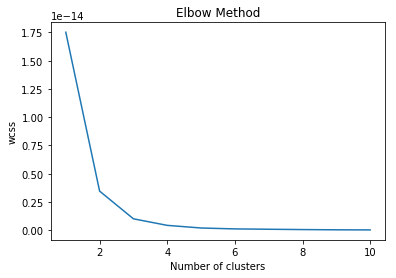

In [25]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

### Trainning
Nous allons 

In [26]:
k=2
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, max_iter=600, algorithm = 'auto')
kmeans.fit(X)
#y_kmeans=kmeans.fit_predict(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print("Score: ", correct/len(X))

Score:  0.8648648648648649


In [28]:
y_pred = kmeans.predict(X)
predict_data=trainSet
predict_data['IS_FP']=y_pred

predict_data

,RC,MIN,MAX,MEAN,START,END,DURATION,CV,A1,A2,A3,A4,FP,IS_FP
0,556.0,-60.5,-53.0,-54.115108,1.579697e+15,1.579697e+15,82996456.0,-0.013790,0.0,0.0,556.0,0.0,1,1
1,1.0,-63.5,-63.5,-63.500000,1.579700e+15,1.579700e+15,0.0,-0.000000,0.0,1.0,0.0,0.0,1,0
2,8.0,-56.5,-55.0,-55.875000,1.579697e+15,1.579697e+15,22464963.0,-0.008664,0.0,0.0,8.0,0.0,1,0
3,193.0,-63.5,-56.5,-57.176166,1.579699e+15,1.579699e+15,27611724.0,-0.010867,0.0,0.0,0.0,193.0,1,1
4,1.0,-58.5,-58.5,-58.500000,1.579701e+15,1.579701e+15,0.0,-0.000000,1.0,0.0,0.0,0.0,0,0
5,10.0,-65.0,-58.5,-62.100000,1.579697e+15,1.579697e+15,739426.0,-0.036862,2.0,0.0,4.0,4.0,0,0
6,2070.0,-63.5,-55.0,-59.737198,1.579697e+15,1.579697e+15,83239829.0,-0.045504,505.0,542.0,481.0,542.0,1,1
7,2.0,-63.5,-63.5,-63.500000,1.579701e+15,1.579701e+15,37073.0,-0.000000,0.0,0.0,2.0,0.0,0,0
8,861.0,-63.5,-55.0,-59.699768,1.579697e+15,1.579697e+15,32988482.0,-0.045002,190.0,221.0,225.0,225.0,1,1
9,6.0,-59.5,-53.5,-56.166667,1.579701e+15,1.579701e+15,636839.0,-0.042899,2.0,2.0,2.0,0.0,0,0


In [31]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def printCv(clf, xFeatures, y_true, size):
    print("Cross validation: \n",cross_val_score(clf, xFeatures, y_true, cv=5))

def printMetrics(y, y_pred):
    print("Confusion Matrix\n",metrics.confusion_matrix(y, y_pred))
    print("Accuracy: ", metrics.accuracy_score(y, y_pred))
    print("Ajusted Rand Square",metrics.adjusted_rand_score(y, y_pred))
      
printMetrics(y,y_pred)
predict_data['crossValid'] = cross_val_score(kmeans, X, y, cv=len(trainSet))
    

Confusion Matrix
 [[82  2]
 [19 45]]
Accuracy:  0.858108108108
Ajusted Rand Square 0.508928818982


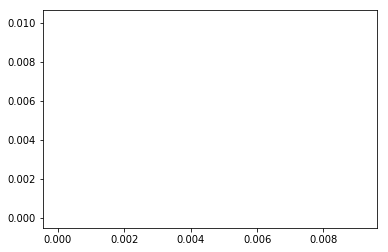

In [29]:
centroids = kmeans.cluster_centers_

#plt.figure(figsize=(8, 6))
for i in range(len(X)):
    #print(trainSet.iloc[i][1])
    plt.plot(X[i][6], X[i][7], colors[y_pred[i]], markersize = 5)
    

#plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=50, linewidths = 5, zorder = 10,c='black')
plt.legend()
plt.show()

In [32]:
#LoadData
path='../2-TransformedData/testSet_2020-Jan-29-21_10_32.csv'

#path='../2-TransformedData/data2_2020-Jan-31-10_55_51.csv'
#toPredict = pd.read_csv(path,names=["RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4"], sep=',')
#XFeature = np.array(toPredict).astype(int)

toPredict = pd.read_csv(path,names=["ECP","RC","MIN","MAX","MEAN","START","END","DURATION","CV","A1","A2","A3","A4","FP"], sep=',')

XFeature = np.array(toPredict.loc[:,'RC':'A4']).astype(int)
XFeature = preprocessing.normalize(XFeature)
y_p = kmeans.predict(XFeature)

toPredict['IS_FP']=y_p

toPredict

,ECP,RC,MIN,MAX,MEAN,START,END,DURATION,CV,A1,A2,A3,A4,FP,IS_FP
0,245390003868,210,-67.0,-58.5,-61.957143,1579699702957564,1579699747867390,44909826,-0.020082,7,5,198,0,1,1
1,245390003869,174,-63.0,-56.5,-60.583333,1579699702975300,1579699745158768,42183468,-0.016437,0,0,173,1,1,1
2,300000000000000000017856,1,-63.5,-63.5,-63.500000,1579699733327556,1579699733327556,0,-0.000000,0,1,0,0,1,0
3,300000000000000000017857,304,-63.5,-56.0,-57.626645,1579699703039548,1579699747950958,44911410,-0.015811,0,2,1,301,1,1
4,300000000000000000017858,1,-57.5,-57.5,-57.500000,1579699717786689,1579699717786689,0,-0.000000,0,0,1,0,1,0
5,30000000000000000001785C,287,-58.5,-53.0,-54.932056,1579699702951407,1579699745675824,42724417,-0.017785,3,0,284,0,1,1
6,30000000000000000001785D,309,-64.5,-58.0,-61.085761,1579699703042235,1579699748151155,45108920,-0.014276,2,11,0,296,1,1
7,30000000000000000001785E,4,-60.0,-58.5,-59.500000,1579699713693963,1579699714336538,642575,-0.010292,4,0,0,0,0,0
8,300000000000000000017862,11,-60.5,-54.0,-57.000000,1579699710512550,1579699715069601,4557051,-0.036071,5,0,6,0,0,0
9,300000000000000000017863,18,-60.5,-52.5,-57.305556,1579699731195273,1579699733021167,1825894,-0.037713,0,10,0,8,0,0


In [33]:
#Export predict data
pathExport='../6-ClassifiedData/20200217kmeans_predict.csv'
predict_data.to_csv(pathExport, index = None, header=True)